<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-Packages" data-toc-modified-id="Load-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Packages</a></span></li><li><span><a href="#Load-Cleaned-Data" data-toc-modified-id="Load-Cleaned-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Cleaned Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#How-many-retweets-each-supermarket-has?" data-toc-modified-id="How-many-retweets-each-supermarket-has?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>How many retweets each supermarket has?</a></span></li></ul></li><li><span><a href="#What-about-user_favorites_count,-followers,-and-friends?" data-toc-modified-id="What-about-user_favorites_count,-followers,-and-friends?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What about user_favorites_count, followers, and friends?</a></span><ul class="toc-item"><li><span><a href="#How-many-Tweets-have-the-supermarkets-liked-in-the-account's-lifetime?" data-toc-modified-id="How-many-Tweets-have-the-supermarkets-liked-in-the-account's-lifetime?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>How many Tweets have the supermarkets liked in the account's lifetime?</a></span></li><li><span><a href="#How-many-followers-each-supermarket-has?" data-toc-modified-id="How-many-followers-each-supermarket-has?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>How many followers each supermarket has?</a></span></li><li><span><a href="#How-many-users-does-each-supermarket-follow?" data-toc-modified-id="How-many-users-does-each-supermarket-follow?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>How many users does each supermarket follow?</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#How-corona-has-impacted-the-sentiment-of-customers-of-the-main-(online)-supermarkets?" data-toc-modified-id="How-corona-has-impacted-the-sentiment-of-customers-of-the-main-(online)-supermarkets?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>How corona has impacted the sentiment of customers of the main (online) supermarkets?</a></span><ul class="toc-item"><li><span><a href="#How-COVID-19-influenced-the-sentiment-of-online-supermarket-customers-during-the-period-of-March-30-until-June-24th?" data-toc-modified-id="How-COVID-19-influenced-the-sentiment-of-online-supermarket-customers-during-the-period-of-March-30-until-June-24th?-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>How COVID-19 influenced the sentiment of online supermarket customers during the period of March 30 until June 24th?</a></span></li><li><span><a href="#What-if-we-limit-the-date-until-23rd-April-?" data-toc-modified-id="What-if-we-limit-the-date-until-23rd-April-?-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>What if we limit the date until 23rd April ?</a></span></li><li><span><a href="#What-about-after-May-1st-?" data-toc-modified-id="What-about-after-May-1st-?-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>What about after May 1st ?</a></span></li></ul></li></ul></li><li><span><a href="#Word-Frequency-Analysis" data-toc-modified-id="Word-Frequency-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Word Frequency Analysis</a></span><ul class="toc-item"><li><span><a href="#Languages-of-messages" data-toc-modified-id="Languages-of-messages-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Languages of messages</a></span></li></ul></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Word Cloud</a></span></li><li><span><a href="#Analysing-Queries" data-toc-modified-id="Analysing-Queries-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Analysing Queries</a></span><ul class="toc-item"><li><span><a href="#Load-query-data" data-toc-modified-id="Load-query-data-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Load query data</a></span></li></ul></li></ul></div>

# Introduction

In this notebook we perform some EDA and Sentiment Analysis of the data collected in the period `March 30th, 2020 till June 24th, 2020`. This period does not cover all period considering the 1st corona case in The Netherlands (February 27th) but as seen in the following graph still covers an important period of the crisis.

We expect to observe some influence of COVID-19 on the sentiment extract from the Tweets over this period.

![corona cases from 27022020 until 25062020](../images/graph_corona_cases_nl_270220_250620.jpg)
source: https://www.rivm.nl/coronavirus-covid-19/grafieken

Our analysis separated in two parts:

1. **[User timeline data](#User-Timeline-Tweet-Data)** 
2. Search data (TO DO)

Our analysis consists in:

1. **[Exploratory Data Analysis](#Exploratory-Data-Analysis)**: Explore each supermarket through their count of retweets, followers, friends etc.
2. **[Sentiment Analysis](#Sentiment-Analysis)**:
    - How corona has impacted the sentiment of customers of the main (online) supermarkets?

In [3]:
"Concatenating Data within period March 30th and June 24th".replace(" ","-")

'Concatenating-Data-within-period-March-30th-and-June-24th'

# Load Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

TodaysDate = time.strftime("%Y-%m-%d")

# Load Cleaned Data

In [5]:
df_all = pd.read_csv("../data/processed/tweets_data_for_sentiment_analysis_2020-06-28.csv",index_col='created_at')
df_all.head()

,screen_name,user_favourites_count,followers_count,friends_count,retweet_count,hashtags,source,language,text,cleaned_text,cleaned_text_without_stop,polarity,sentiment
created_at,,,,,,,,,,,,,
2020-03-30 08:04:02+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,"@derots Voorraad is er genoeg, het is voor ons...",voorraad is er genoeg het is voor ons echter e...,voorraad genoeg logistieke uitdaging juiste mo...,0.16,positive
2020-03-30 08:14:24+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@MoniquevDBurgh We doen er alles aan om zoveel...,we doen er alles aan om zoveel mogelijk bezorg...,bezorg afhaalmomenten krijgen bezorgmoment vol...,0.22,positive
2020-03-30 08:23:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@AnnekeVisser15 Klopt! De Persoonlijke Bonus w...,klopt de persoonlijke bonus wordt tijdelijk ni...,klopt persoonlijke bonus tijdelijk operatie ...,0.12,positive
2020-03-30 08:26:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@waltervantiel We kopen groenten en fruit z...,we kopen groenten en fruit zo dichtbij als mog...,kopen groenten fruit dichtbij ver noodzakelijk...,0.13,positive
2020-03-30 08:30:44+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@bbstring Je kunt ons het beste een privéberic...,je kunt ons het beste een privebericht sturen ...,beste privebericht sturen vraag bezorgmomen...,0.21,positive


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 2020-03-30 08:04:02+00:00 to 2020-06-24 15:06:54+00:00
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   screen_name                6034 non-null   object 
 1   user_favourites_count      5780 non-null   float64
 2   followers_count            5780 non-null   float64
 3   friends_count              5780 non-null   float64
 4   retweet_count              6034 non-null   int64  
 5   hashtags                   8 non-null      object 
 6   source                     6034 non-null   object 
 7   language                   6034 non-null   object 
 8   text                       6034 non-null   object 
 9   cleaned_text               6034 non-null   object 
 10  cleaned_text_without_stop  6034 non-null   object 
 11  polarity                   6034 non-null   float64
 12  sentiment                  6034 non-null   object 
dtypes: float

# Exploratory Data Analysis

Let's analyze some metrics of Twitter to see how is the relationship of users and supermarkets?

## How many retweets each supermarket has?

In [7]:
df_all['retweet_count'].value_counts()

0     5994
1       24
2        4
3        3
7        2
19       1
15       1
61       1
21       1
5        1
16       1
4        1
Name: retweet_count, dtype: int64

In [8]:
df_all.groupby('screen_name')['retweet_count'].value_counts()

screen_name      retweet_count
JumboSupermarkt  0                2235
                 1                   7
                 3                   2
                 7                   1
albertheijn      0                3350
                 1                  15
                 2                   3
                 3                   1
                 4                   1
                 5                   1
                 7                   1
                 15                  1
                 16                  1
                 21                  1
                 61                  1
picnic           0                 409
                 1                   2
                 2                   1
                 19                  1
Name: retweet_count, dtype: int64

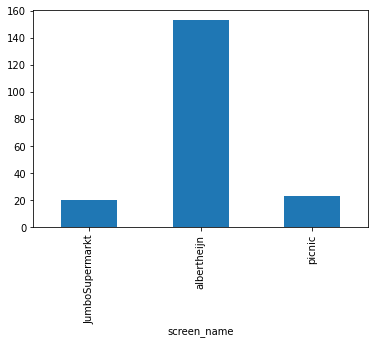

In [9]:
df_all.groupby('screen_name')['retweet_count'].sum().plot.bar()

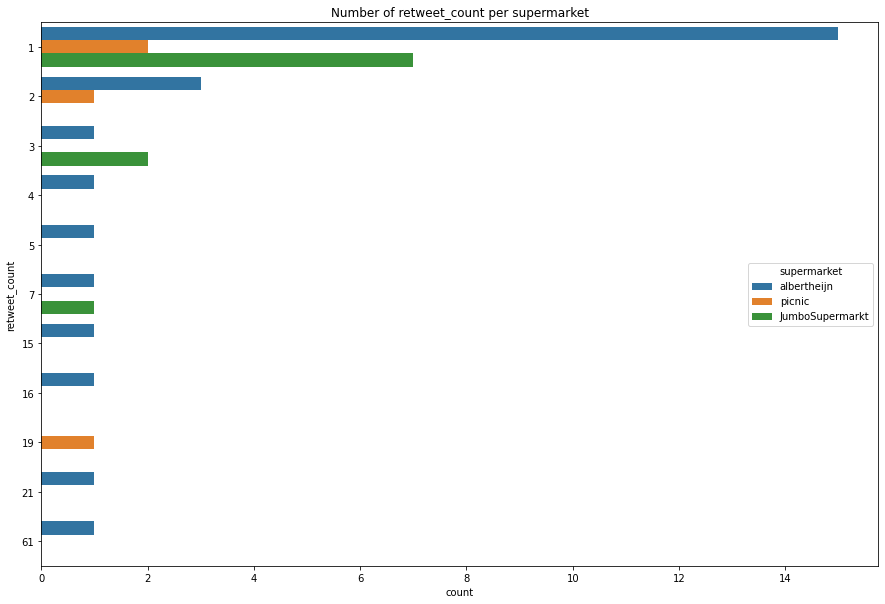

In [10]:
plt.figure(figsize=(15,10))
plt.title("Number of retweet_count per supermarket")
sns.countplot(data = df_all[df_all['retweet_count'] !=0], y = 'retweet_count', hue = 'screen_name')
plt.legend(loc = "center right", title = "supermarket")

Usually AH is more retweeted. 15 times there were 1 retweet, 4 times 2 retweets, there were one tweet that was retweeted 61 times!

In [11]:
df_all['text'][df_all['retweet_count']==61].values[0]

'@nterhall Ik kan me voorstellen dat je aanstoot hebt genomen aan deze grap. Wij distantiëren ons er uiteraard absoluut van. Er is geen plaats voor discriminatie bij Albert Heijn. Voor de goede orde: we zijn géén sponsor van dit tv-programma, en stoppen met de reclames eromheen.'

Picnic is the next one with 23 retweets. The most retweeted Tweet (19 times) was:

In [12]:
df_all['text'][(df_all['retweet_count']==19)&(df_all['screen_name']=='picnic')].values[0]

'Net als andere ziekenhuizen levert het ErasmusMC bijna bovenmenselijke prestaties. Om ze te steunen garanderen we artsen en verpleegkundigen van het Corona team vanaf vandaag een plek in onze autootjes. Zo kunnen ze na een lange dienst altijd gewoon hun boodschappen bestellen❤️ https://t.co/uRnaqW1f9W'

And Jumbo comes next with 22 tweets, the most retweeted (7 times) was:

In [13]:
df_all['text'][(df_all['retweet_count']==7)&(df_all['screen_name']=='JumboSupermarkt')].values[0]

'Na de succesvolle introductie van 1 ster Beter leven zuivel  met @Dierbescherming, @NatuurenMilieu en @vogelnieuws, breiden we de lijn uit met karnemelk, halfvolle yoghurt en diverse 500 ml verpakkingen! Een milieuvriendelijke en diervriendelijke keuze! https://t.co/HI833VGy6a https://t.co/1h7TtTeLpo'

# What about user_favorites_count, followers, and friends?

Just to remind the definitions:

`user_favourites_count`: The number of Tweets this user has liked in the account’s lifetime

`followers_count`: The number of followers this account currently has.

`friends_count`: The number of users this account is following (AKA their “followings”)

In [14]:
df = df_all[['screen_name','user_favourites_count','followers_count','friends_count']][df_all['followers_count'].notnull()].drop_duplicates(keep='last')
df

,screen_name,user_favourites_count,followers_count,friends_count
created_at,,,,
2020-06-24 13:56:42+00:00,JumboSupermarkt,3767.0,16208.0,1710.0
2020-06-24 14:34:45+00:00,picnic,3885.0,4842.0,5.0
2020-06-24 15:06:54+00:00,albertheijn,580.0,45540.0,6.0


## How many Tweets have the supermarkets liked in the account's lifetime?

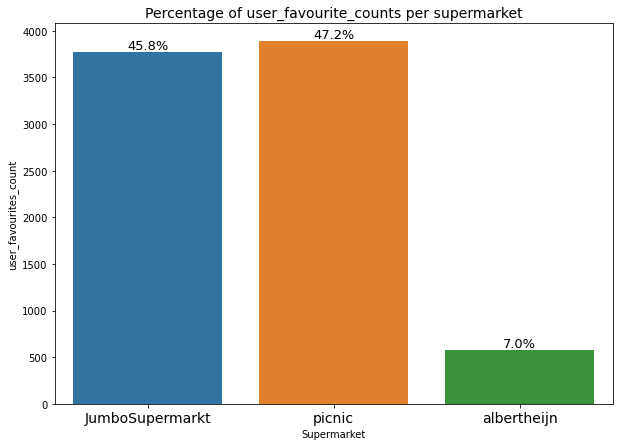

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=df, x = 'screen_name', y = 'user_favourites_count')
ax.set_title("Percentage of user_favourite_counts per supermarket", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Supermarket")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/sum(df["user_favourites_count"])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

## How many followers each supermarket has?

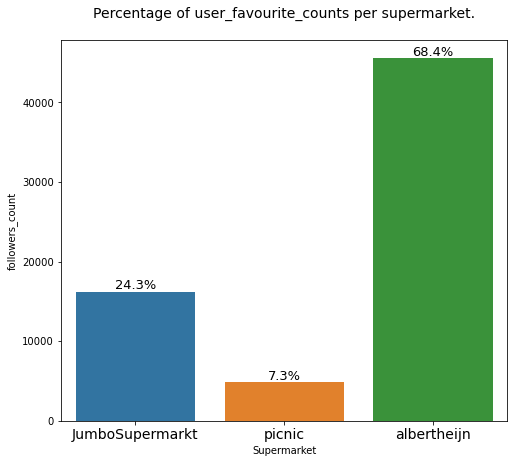

In [16]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data=df, x = 'screen_name', y = 'followers_count')
ax.set_title("Percentage of user_favourite_counts per supermarket.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Supermarket")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/sum(df["followers_count"])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

## How many users does each supermarket follow?

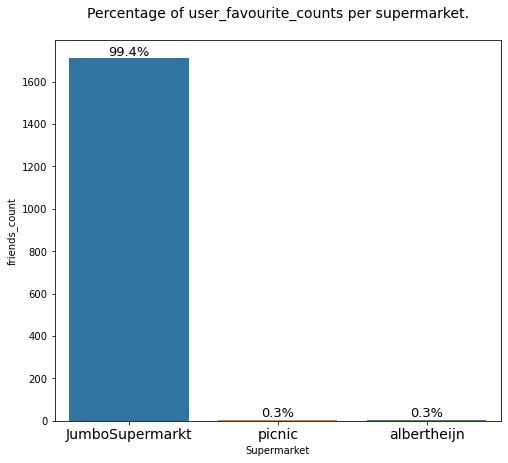

In [17]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data=df, x = 'screen_name', y = 'friends_count')
ax.set_title("Percentage of user_favourite_counts per supermarket.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Supermarket")


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/sum(df["friends_count"])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

# Sentiment Analysis

## How corona has impacted the sentiment of customers of the main (online) supermarkets?

Bellow the graphic that shows the number of cases per day. We will try to see how the sentiment of customers of the main online supermarkets (AH, Jumbo, and Picnic) changed with time.

The interval covered by our data goes from March 30th, 2020 until June 24th, 2020. Unfortunately, because of limitations imposed by Twitter API we were no able to cover all period of the corona crisis, i.e., from February 27th were the 1st case was reported.

![corona cases from 27022020 until 25062020](../images/graph_corona_cases_nl_270220_250620.jpg)
source: https://www.rivm.nl/coronavirus-covid-19/grafieken


### How COVID-19 influenced the sentiment of online supermarket customers during the period of March 30 until June 24th?

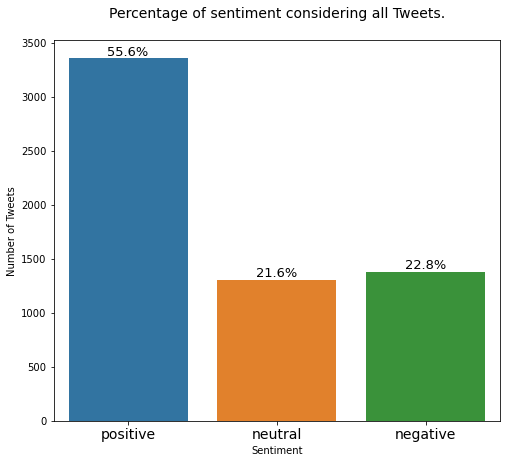

In [18]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all, x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

In general, the sentiment is positive. And what if we consider each one of the supermarkets?

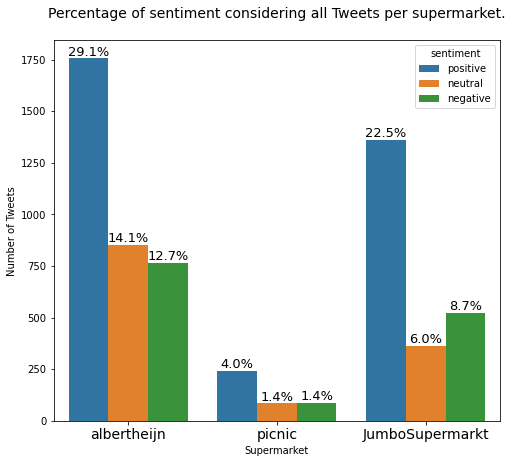

In [19]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all, x = 'screen_name', hue = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets per supermarket.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Supermarket")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

**USE THE FOLLOWING CODE FOR 2 (ABOVE) AND ADAPT ANOTHER ONE FOR 3 (BELLOW)**

In [ ]:
df_not_extreme = df_participants[df_participants.level_extreme=='not_extreme']
len(df_not_extreme)

In [ ]:
df_extreme = df_participants[df_participants.level_extreme=='extreme']
len(df_extreme)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (18,6))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Ranking of 'most_enjoyable_playlist' separated by 'extreme' and 'not_extreme' playlists.",fontsize = 16)

sns.countplot('most_enjoyable_playlist',data = df_extreme, order = ['low_mood_low_tempo_extr', 
                                                                    'low_mood_high_tempo_extr', 
                                                                    'high_mood_low_tempo_extr'],ax = axs[0])

for p in axs[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[0].annotate('{:.1f}%'.format(100.*y/len(df_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    axs[0].set_title("Extreme", size = 13 )

axs[0].set_xlabel("Most enjoyable playlist - Extreme group", size = 13)
axs[0].set_ylabel("Percentage of votes", size = 13)     
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=10)
axs[0].set_ylim(0,9.5)



sns.countplot('most_enjoyable_playlist', data = df_not_extreme,order = ['low_mood_low_tempo_not_extr', 
                                                                        'low_mood_high_tempo_not_extr', 
                                                                        'high_mood_low_tempo_not_extr'], ax = axs[1] )

for p in axs[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[1].annotate('{:.1f}%'.format(100.*y/len(df_not_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    axs[1].set_title("Not Extreme", size = 13 )
    
axs[1].set_xlabel("Most enjoyable playlist - Not extreme group", size = 13)
axs[1].set_ylabel("Percentage of votes", size = 13)  
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=10)
axs[1].set_ylim(0,9.5)

It is still positive but notice that for Jumbo there are more negative than neutral reactions.

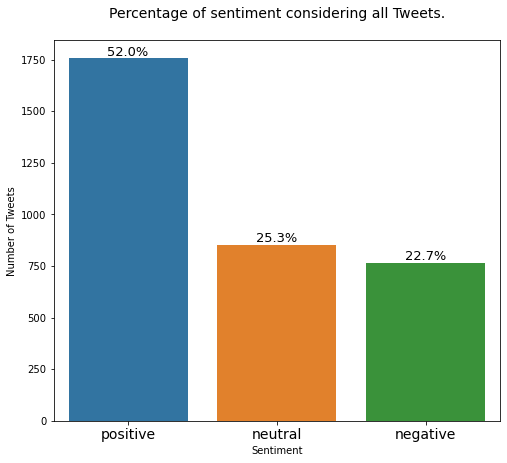

In [27]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[df_all['screen_name']=='albertheijn'], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[df_all['screen_name']=='albertheijn'])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

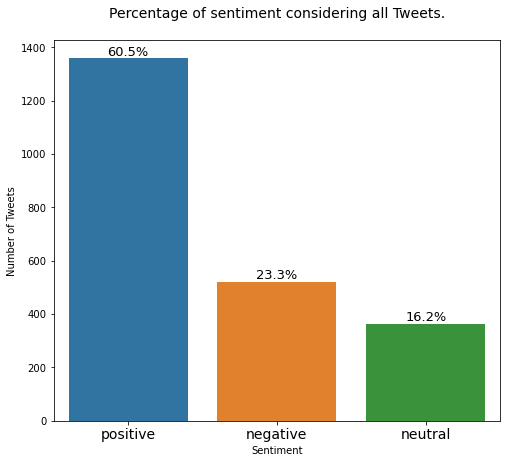

In [28]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[df_all['screen_name']=='JumboSupermarkt'], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[df_all['screen_name']=='JumboSupermarkt'])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

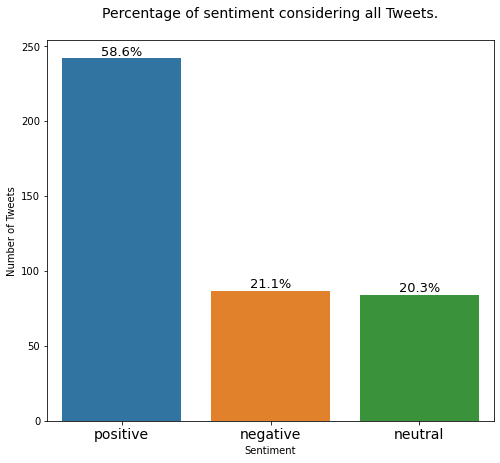

In [29]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[df_all['screen_name']=='picnic'], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[df_all['screen_name']=='picnic'])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

### What if we limit the date until 23rd April ?

In [30]:
df_ah = df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='albertheijn')]

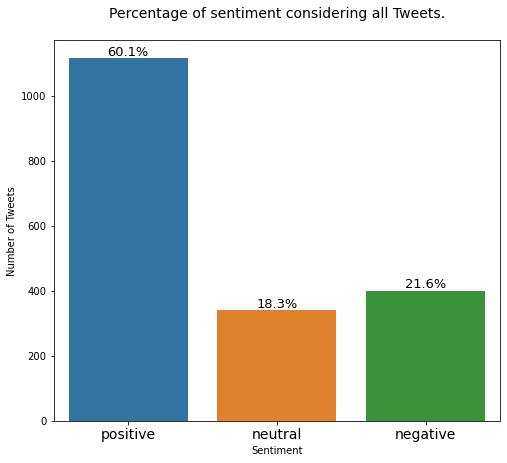

In [31]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[df_all.index < '2020-04-23'], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[df_all.index < '2020-04-23'])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

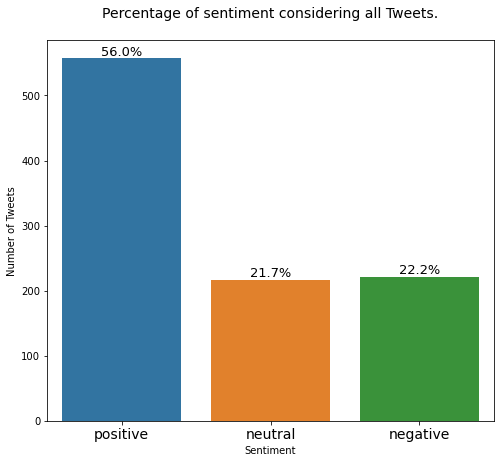

In [32]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='albertheijn')], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='albertheijn')])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

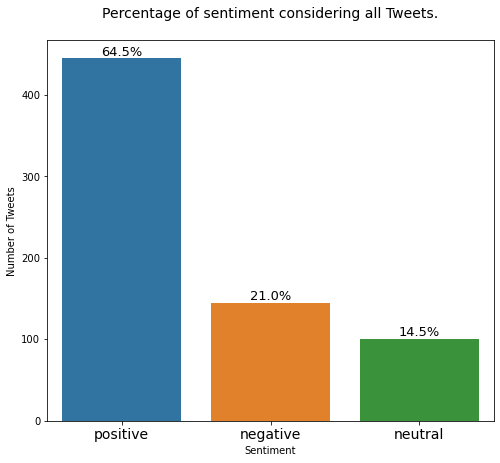

In [33]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='JumboSupermarkt')], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='JumboSupermarkt')])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

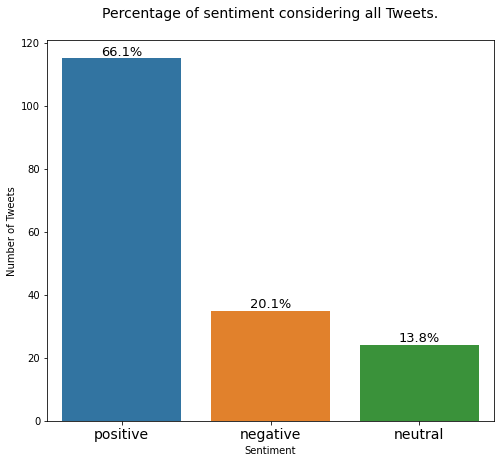

In [34]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='picnic')], x = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[(df_all.index < '2020-04-23') & (df_all['screen_name']=='picnic')])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

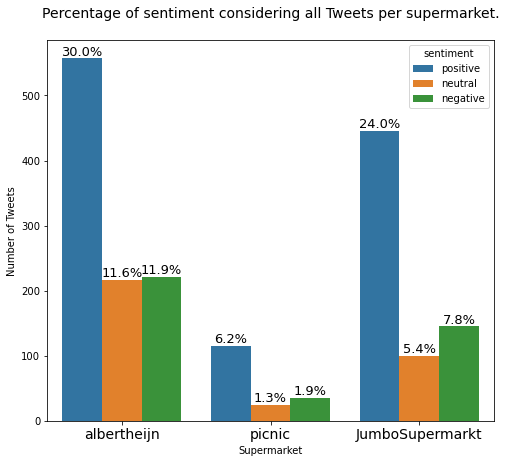

In [35]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.countplot(data=df_all[df_all.index < '2020-04-23'], x = 'screen_name', hue = 'sentiment')
ax.set_title("Percentage of sentiment considering all Tweets per supermarket.\n", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), size = 14)
plt.xlabel("Supermarket")
plt.ylabel("Number of Tweets")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/len(df_all[df_all.index < '2020-04-23'])), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

In this period negativity is higher than neutrality if compared with the total period. However, positivity increased a bit. Is people less neutral and more positive?? Since the period were corona cases were increasing in a higher rate passed and there were a lot of highs and lows the sentiment is not always negative. In addition, almost two months passed since the 1st case and people start to adapt better to the situation.

### What about after May 1st ? 

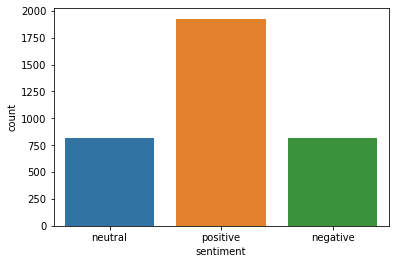

In [36]:
sns.countplot(data=df_all[df_all.index > '2020-05-01'], x = 'sentiment')

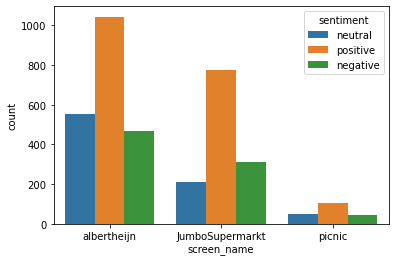

In [37]:
sns.countplot(data=df_all[df_all.index > '2020-05-01'], x = 'screen_name', hue = 'sentiment')

Everybody is happy! Corona is almost gone, supermarkets were able to deal with the high demand of the 1st months, and probably the number of people ordering online has decreased.

However, again there are more negative Tweets than neutral ones for Jumbo. For picnic there is no difference between negative and neutral.

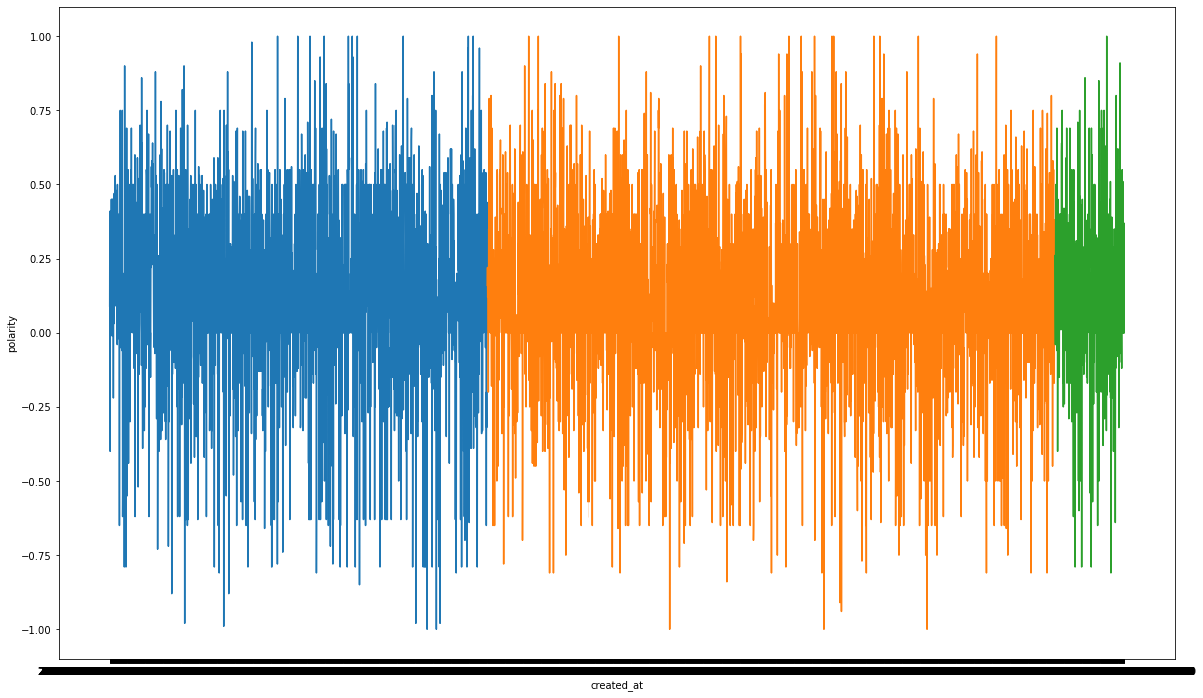

In [38]:
plt.figure(figsize=(20,12))
sns.lineplot(x=df_all[df_all['screen_name']=='JumboSupermarkt'].index, y=df_all[df_all['screen_name']=='JumboSupermarkt'].polarity)
sns.lineplot(x=df_all[df_all['screen_name']=='albertheijn'].index, y=df_all[df_all['screen_name']=='albertheijn'].polarity)
sns.lineplot(x=df_all[df_all['screen_name']=='picnic'].index, y=df_all[df_all['screen_name']=='picnic'].polarity)
plt.show()

If 

In [39]:
df_all[df_all.index > '2020-05-01']

,screen_name,user_favourites_count,followers_count,friends_count,retweet_count,hashtags,source,language,text,cleaned_text,cleaned_text_without_stop,polarity,sentiment
created_at,,,,,,,,,,,,,
2020-05-01 06:20:16+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Twitter Web App,nl,"@eyViStaNL Hoi, Stanley. Ik kan niks beloven, ...",hoi stanley ik kan niks beloven maar jouw sugg...,hoi stanley niks beloven suggestie geef lisa,0.00,neutral
2020-05-01 06:42:01+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@M0esje Hoi! Dat kan hoor!👍 ^Lisa,hoi dat kan hoor lisa,hoi hoor lisa,0.00,neutral
2020-05-01 06:42:10+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@AichaLagha We hebben inderdaad maatregelen mo...,we hebben inderdaad maatregelen moeten nemen o...,inderdaad maatregelen nemen veiligheid klanten...,0.02,positive
2020-05-01 06:54:43+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@gijssepijs We zijn inderdaad even gestopt met...,we zijn inderdaad even gestopt met de koopzege...,inderdaad gestopt koopzegels maandag 11 mei ko...,0.10,positive
2020-05-01 07:00:42+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@Winanda1965 Wat fijn💙! ^Marlieke,wat fijn marlieke,fijn marlieke,0.00,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24 13:56:42+00:00,JumboSupermarkt,3767.0,16208.0,1710.0,0,NaN,Twitter Web App,nl,"@jaantje75 Hallo, we zien dat je bericht er tu...",hallo we zien dat je bericht er tussendoor is ...,hallo zien bericht tussendoor gegaan sorry hie...,0.30,positive
2020-06-24 14:32:41+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@zomaareendame Oh jee! Dat kan bij mij. Als je...,oh jee dat kan bij mij als je ons een priveber...,oh jee priveberichtje stuurt pak yasmine,0.00,neutral
2020-06-24 14:34:45+00:00,picnic,3885.0,4842.0,5.0,0,NaN,Twitter Web App,nl,@RuudVeHa Ik stuur je even een privébericht zo...,ik stuur je even een privebericht zodat ik je ...,stuur privebericht zodat vertellen ruud mylene,0.00,neutral


In [40]:
df_all[df_all.index < '2020-04-23']

,screen_name,user_favourites_count,followers_count,friends_count,retweet_count,hashtags,source,language,text,cleaned_text,cleaned_text_without_stop,polarity,sentiment
created_at,,,,,,,,,,,,,
2020-03-30 08:04:02+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,"@derots Voorraad is er genoeg, het is voor ons...",voorraad is er genoeg het is voor ons echter e...,voorraad genoeg logistieke uitdaging juiste mo...,0.16,positive
2020-03-30 08:14:24+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@MoniquevDBurgh We doen er alles aan om zoveel...,we doen er alles aan om zoveel mogelijk bezorg...,bezorg afhaalmomenten krijgen bezorgmoment vol...,0.22,positive
2020-03-30 08:23:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@AnnekeVisser15 Klopt! De Persoonlijke Bonus w...,klopt de persoonlijke bonus wordt tijdelijk ni...,klopt persoonlijke bonus tijdelijk operatie ...,0.12,positive
2020-03-30 08:26:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@waltervantiel We kopen groenten en fruit z...,we kopen groenten en fruit zo dichtbij als mog...,kopen groenten fruit dichtbij ver noodzakelijk...,0.13,positive
2020-03-30 08:30:44+00:00,albertheijn,NaN,NaN,NaN,0,NaN,Tracebuzz,nl,@bbstring Je kunt ons het beste een privéberic...,je kunt ons het beste een privebericht sturen ...,beste privebericht sturen vraag bezorgmomen...,0.21,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 16:47:13+00:00,albertheijn,580.0,45540.0,6.0,0,NaN,Tracebuzz,nl,@rrrjinn Niet. ^Ruben,niet ruben,ruben,0.00,neutral
2020-04-22 18:26:50+00:00,JumboSupermarkt,3767.0,16208.0,1710.0,0,NaN,Salesforce - Social Studio,nl,"@Patjed3 Hallo, we durven zo niet te zeggen wa...",hallo we durven zo niet te zeggen waarom dit f...,hallo durven zeggen filiaal hiervoor gekozen h...,0.00,neutral
2020-04-22 18:30:33+00:00,JumboSupermarkt,3767.0,16208.0,1710.0,0,NaN,Salesforce - Social Studio,nl,"@rich3544 Hallo Richard, dat klinkt vervelend....",hallo richard dat klinkt vervelend wat is er p...,hallo richard klinkt vervelend gebeurd lh,-0.12,negative


# Word Frequency Analysis

## Languages of messages

In [47]:
import spacy # fast NLP
from sklearn.feature_extraction.text import CountVectorizer

# import spacy module for Dutch language
nlp_nl = spacy.load('nl_core_news_sm')
spacy_stopwords = spacy.lang.nl.stop_words.STOP_WORDS

In [53]:
# model with all words
cvec_with = CountVectorizer()
cvec_with.fit(df_all.cleaned_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [55]:
len(cvec_with.get_feature_names())

7455

In [64]:
# model without stop words
cvec_without = CountVectorizer(stop_words=spacy_stopwords)
cvec_without.fit(df_all.cleaned_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={"'t", 'aan', 'aangaangde', 'aangezien', 'achter',
                            'achterna', 'af', 'afgelopen', 'al', 'aldus',
                            'alhoewel', 'alle', 'allebei', 'alleen', 'allen',
                            'alles', 'als', 'altijd', 'ander', 'andere',
                            'anderen', 'anders', 'anderzijds', 'behalve',
                            'beide', 'beiden', 'ben', 'beneden', 'bent',
                            'bepaald', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [65]:
len(cvec_without.get_feature_names())

7182

In [68]:
df_ah = df_all[df_all['screen_name']=='albertheijn']
df_ah = df_all[df_all['screen_name']=='JumboSupermarkt']
df_ah = df_all[df_all['screen_name']=='picnic']

In [72]:
neg_doc_matrix = cvec_with.transform(df_all[df_all.sentiment == 'negative'].cleaned_text)
pos_doc_matrix = cvec_with.transform(df_all[df_all.sentiment == 'positive'].cleaned_text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df_with = pd.DataFrame([neg,pos],columns=cvec_with.get_feature_names()).transpose()
term_freq_df_with.head()

term_freq_df_with.columns = ['negative', 'positive']
term_freq_df_with['total'] = term_freq_df_with['negative'] + term_freq_df_with['positive']
term_freq_df_with.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
je,2052,3868,5920
de,1479,3664,5143
het,1161,2698,3859
een,845,1810,2655
we,728,1907,2635
is,782,1755,2537
dat,893,1636,2529
niet,697,1271,1968
dit,607,1342,1949
te,536,1360,1896


In [73]:
neg_doc_matrix = cvec_without.transform(df_all[df_all.sentiment == 'negative'].cleaned_text)
pos_doc_matrix = cvec_without.transform(df_all[df_all.sentiment == 'positive'].cleaned_text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df_without = pd.DataFrame([neg,pos],columns=cvec_without.get_feature_names()).transpose()
term_freq_df_without.head()

term_freq_df_without.columns = ['negative', 'positive']
term_freq_df_without['total'] = term_freq_df_without['negative'] + term_freq_df_without['positive']
term_freq_df_without.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
hallo,443,1015,1458
winkel,264,493,757
hi,265,465,730
fijne,55,532,587
sorry,220,354,574
graag,251,320,571
dag,79,440,519
excuses,200,310,510
helaas,155,352,507
inderdaad,161,345,506


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

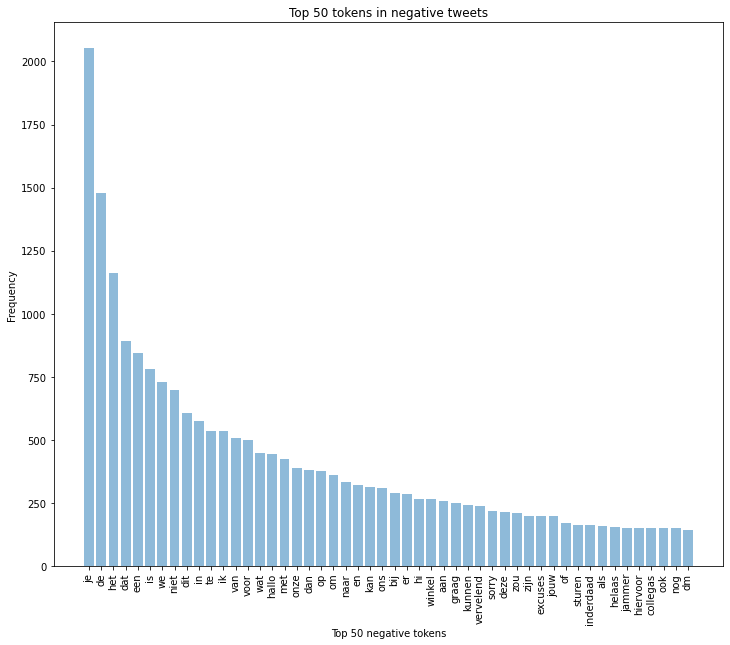

In [74]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df_with.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df_with.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

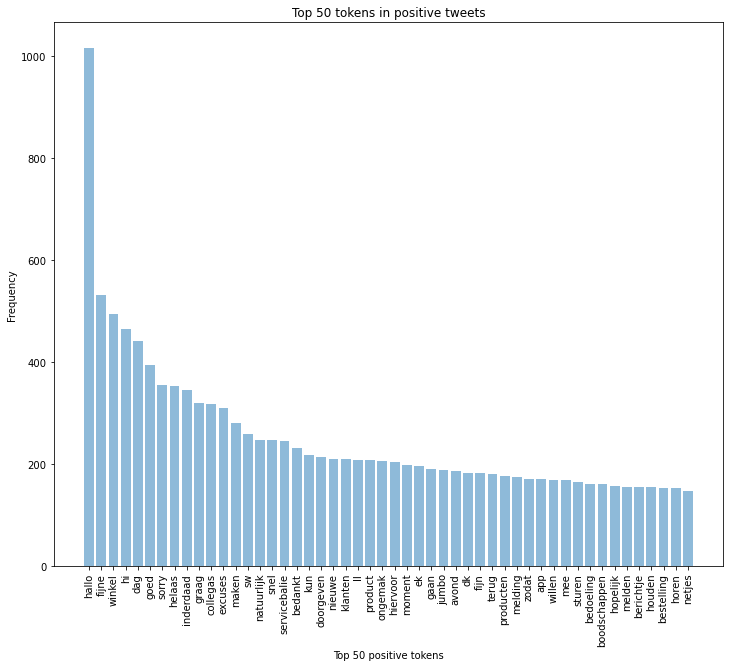

In [75]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df_without.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df_without.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

In [40]:
neg_doc_matrix = cvec.transform(df_all[df_all.sentiment == 'negative'].text)
pos_doc_matrix = cvec.transform(df_all[df_all.sentiment == 'positive'].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
hallo,444,1015,1459
winkel,265,497,762
hi,265,465,730
fijne,56,533,589
sorry,222,356,578
graag,251,320,571
dag,80,444,524
collega,167,346,513
excuses,200,310,510
helaas,155,352,507


# Word Cloud

# Analysing Queries

## Load query data